## Normal Distributions Arising From Sum of Fluctuations

This is simply a recap of an experiment from Chapter 4.1. The experiment consisted in a 1000 people at a center line each tossing a fair coin and stepping left on a head and stepping right on tails. After 16 coin tosses, the final positions were recorded. The distribution of positions resembles a normal distribution centerted at $0$. 

The explanation based on entropy is that there are far more ways this sum of deviations can be $0$ and hence $0$ has the highest frequency. There are fewer ways this sum could be $1$ or $-1$. And so on.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style()

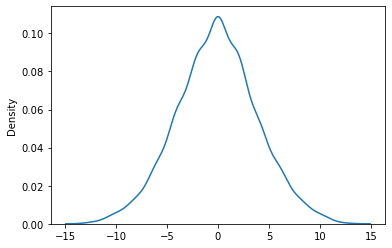

In [2]:
size = 16
num_persons = 1000

deviations = np.random.choice([-1, 1], size=(num_persons, size))
final_pos = np.sum(deviations, axis=1)

sns.kdeplot(final_pos);

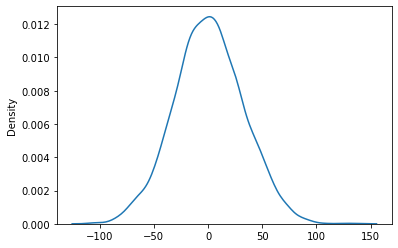

In [3]:
size = 1000
num_persons = 5000

deviations = np.random.choice([-1, 1], size=(num_persons, size))
final_pos = np.sum(deviations, axis=1)

sns.kdeplot(final_pos);

## Entropy

In [4]:
def h(p):
    return sum([- p_i * np.log(p_i) if p_i > 0 else 0.0 for p_i in p ])

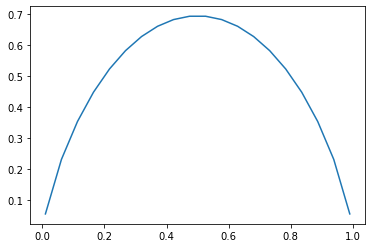

In [5]:
p1_vals = np.linspace(0.01, 0.99, 20)
entropy = [h([p, 1-p]) for p in p1_vals]

plt.plot(p1_vals, entropy)
plt.show();

In [6]:
h([0.5, 0.5])

0.6931471805599453

## Pebbles in Buckets

Let's suppose that we have $10$ numbered pebbles and $5$ numbered buckets. We can arrange the pebbles in buckets in a total of $5^{10}$ ways. If we have $n_i$ pebbles in bucket~$i$, so that $\sum_{i = 1}^{5} n_i = 10 := N$, then the number of ways of achieving this is:
$$
    {N \choose n_1} \cdot {N - n_1 \choose n_2} \cdot {N - n_1 - n_2 \choose n_3} \cdots {N - \sum_{i = 1}^4 n_i \choose n_5}.
$$
This simplifies to:
$$
    \frac{N!}{n_1! n_2! n_3! n_4! n_5!}.
$$

In [7]:
import math

from typing import List


def num_arrangements(num_pebbles: int, pebbles_in_buckets: List[int]):
    numer = math.factorial(num_pebbles)
    res = numer
    
    for k in pebbles_in_buckets:
        res = int(res / math.factorial(k))
        
    return res

In [8]:
num_arrangements(10, [0, 0, 10, 0, 0])

1

In [9]:
num_arrangements(10, [0, 1, 8, 1, 0])

90

In [10]:
num_arrangements(10, [0, 2, 6, 2, 0])

1260

In [11]:
num_arrangements(10, [1, 2, 4, 2, 1])

37800

In [12]:
num_arrangements(10, [2, 2, 2, 2, 2])

113400

### Code 10.1

In [13]:
p_A = [0, 0, 10, 0, 0]
p_B = [0, 1, 8, 1, 0]
p_C = [0, 2, 6, 2, 0]
p_D = [1, 2, 4, 2, 1]
p_E = [2, 2, 2, 2, 2]

p_list = [p_A, p_B, p_C, p_D, p_E]

### Code 10.2

In [14]:
p_norm = list(map(lambda item: np.array(item) / sum(item), p_list))

### Code 10.3

In [15]:
H = [h(p) for p in p_norm]
H

[0.0,
 0.639031859650177,
 0.9502705392332347,
 1.4708084763221112,
 1.6094379124341005]

### Code 10.4

In [16]:
ways = [num_arrangements(10, p) for p in p_list]
logways_pp = np.log(ways) / 10

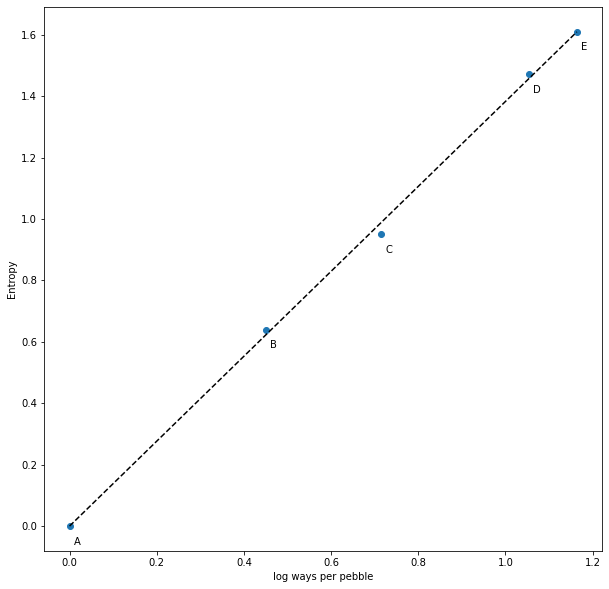

In [17]:
labels = ['A', 'B', 'C', 'D', 'E']

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

ax.scatter(logways_pp, H);
ax.plot([0.0, max(logways_pp)], [0.0, max(H)], "--k");

for i, txt in enumerate(labels):
    ax.annotate(txt, (logways_pp[i] + 0.01, H[i] - 0.06))
    
ax.set_xlabel('log ways per pebble');
ax.set_ylabel('Entropy');